In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
from scipy import stats
import scipy as sc

from mpl_toolkits import mplot3d

Hacemos la función de distribución normal:
\begin{equation}
P(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}
con $\sigma = 2$ y $\mu = 70$

In [2]:
n  = 100000
x = np.linspace(60,80,n)
mu  = 70
sigma = 2
gauss = (1/(sigma*np.sqrt(2*np.pi)))*(np.exp(-np.divide(np.power((x-mu),2),2*(sigma)**2)))

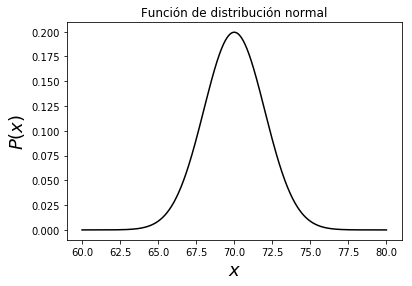

In [3]:
plt.plot(x,gauss,'k')
plt.title("Función de distribución normal")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

Podemos encontrar la función de distribución acumulada de la forma:
\begin{equation}
F(x) = \frac{1}{2} \left[1 + efr\left(\frac{x-\mu}{\sigma\sqrt{2}}\right) \right]
\end{equation}
donde $efr(x)$ es la funcion error

In [4]:
gauss_ac=0.5*(1+sc.special.erf((x-mu)/(sigma*mt.sqrt(2))))

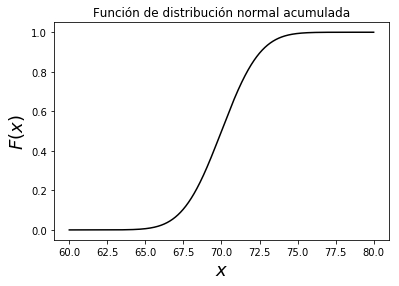

In [5]:
plt.plot(x,gauss_ac,'k')
plt.title("Función de distribución normal acumulada")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$F(x)$",fontsize  =18);

In [6]:
F = np.random.random(10000)
X = (sigma*pow(2,0.5)*sc.special.erfinv(2*F-1)+mu)

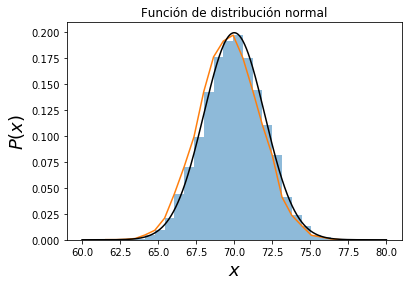

In [7]:
bins = 25
gau = plt.hist(X,bins = bins,density=True,alpha = 0.5)
plt.plot(gau[1][:bins],gau[0])
plt.plot(x,gauss,'k')
plt.title("Función de distribución normal")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

Función de distribución de Poisson:

\begin{equation}
f(k,\lambda) = \frac{e^{-\lambda}\lambda^{k}}{k!}
\end{equation}

In [87]:
def poisson(lam,k):
    return np.divide(np.power(np.e,-lam)*np.power(lam,k),mt.factorial(k))

In [94]:
lam = np.linspace(0,40,1000000)
k = [1,4,10]
pois = np.array([poisson(lam,k[0]),poisson(lam,k[1]),poisson(lam,k[2])])

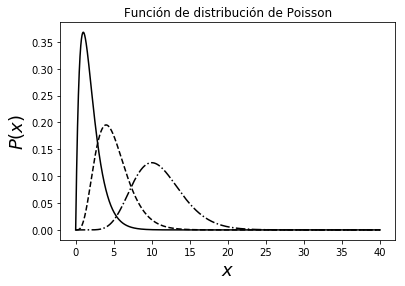

In [95]:
plt.plot(lam,pois[0],'k-')
plt.plot(lam,pois[1],'k--')
plt.plot(lam,pois[2],'k-.')
plt.title("Función de distribución de Poisson")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

Función de distribución acumulada

\begin{equation}
\frac{\Gamma([k+1],\lambda)}{[k]!}
\end{equation}

Donde $\Gamma(x,y)$ es la función gamma incompleta

In [215]:
def poisson_ac(lam,k):
    x = np.linspace(0,k,k+1)
    s = np.zeros_like(lam)
    for i in range(len(x)):
        s = (np.divide(np.power(lam,x[i]),mt.factorial(x[i]))) + s
    return s*np.exp(-lam)

In [205]:
def poisson_ac(lam,k):
    return np.divide(sc.special.gammainc(k+1,lam),mt.factorial(k))

In [216]:
pois_ac = np.array([poisson_ac(lam,k[0]),poisson_ac(lam,k[1]),poisson_ac(lam,k[2])])

In [217]:
pois_ac[1][:]


array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       5.02082686e-13, 5.02064559e-13, 5.02046432e-13])

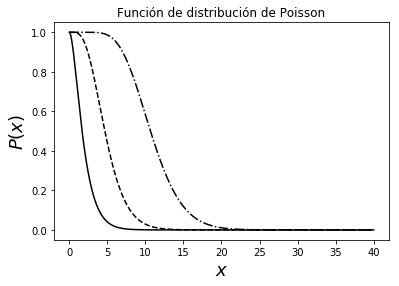

In [218]:
plt.plot(lam,pois_ac[0],'k-')
plt.plot(lam,pois_ac[1],'k--')
plt.plot(lam,pois_ac[2],'k-.')
plt.title("Función de distribución de Poisson")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18);

Distribución Beta

\begin{equation}
f(x) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha - 1}(1-x)^{\beta -1}
\end{equation}

para $0<x<1$

In [287]:
def gamma(x,a,b):
    gam = sc.special.gamma(a+b)/(sc.special.gamma(a)*sc.special.gamma(b))
    return gam*(np.power(x,a-1))*(np.power(1-x,b-1))

In [300]:
x_b = np.linspace(0.001,0.999,100000)
beta = [0.5,1,3,2,5]
alpha = [beta[0],5,1,2,2]
gam = [gamma(x_b,alpha[0],beta[0]),gamma(x_b,alpha[1],beta[1]),gamma(x_b,alpha[2],beta[2]),
       gamma(x_b,alpha[3],beta[3]),gamma(x_b,alpha[4],beta[4])]

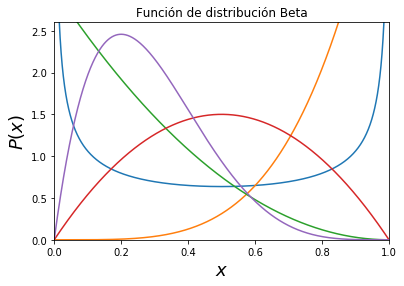

In [305]:
for i in range(len(gam)):
    plt.plot(x_b,gam[i])
plt.title("Función de distribución Beta")
plt.xlabel("$x$",fontsize  =18) 
plt.ylabel("$P(x)$",fontsize  =18)
plt.xlim(0,1)
plt.ylim(0,2.6);

In [ ]:
sc.stats.beta.